# Convex Optimization

## StatML: Lecture 4

### Prof. James Sharpnack

### Reading: "Convex Optimization" Boyd and Vandenberghe Ch. 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Cross validation

Recall that we fit on training set and tested (validated) on test set.  

- We lose much of the data in training if we make test set large
- But if test set is small then the error estimate is noisy

To "stabilize" the test error we can draw a new test set and then average the resulting test errors, this is called *cross-validation*.

### Cross validation

**K-fold cross-validation**
1. Partition data into K sets of size $n/K$ randomly.
2. For each set $i = 1,\ldots,K$:
   1. Fit on all data but the set $i$
   2. Test on set $i$
   3. Obtain test error $e_i$
3. Return error estimate $\frac 1K \sum_i e_i$

**Leave-one-out CV:** Set $K = n$, each sample is its own holdout.

### Convexity 

**Def** A function $f : \mathbb R^p \to \mathbb R$ is convex if for any $0 \le \alpha \le 1$, $x_0, x_1 \in \mathbb R^p$,
$$
f(\alpha x_0 + (1 - \alpha) x_1) \le \alpha f(x_0) + (1 - \alpha) f(x_1).
$$
<img src="convex.png" width=50%>

### Convex Optimization

**Def** Convex optimization is a problem where you must find an argmin of a convex function with convex function constraints.
$$
\min_{x \in \mathbb R^p} f(x) 
$$
subject to
$$
g_i(x) \le 0, \quad i=1,\ldots,m
\tag{Inequality cons.}
$$
$$
h_j(x) = 0, \quad j = 1,\ldots,r
\tag{Equality cons.}
$$
where $f,g_i$ are convex and $h_j$ is affine (i.e. $h_j(x) = A_j x + b_j$).

### Optima

> For convex functions, local minima are global minima

**Def.** Local minimum is a point $x_0$ such that there is a $\rho > 0$ such that for all $x_1 : \|x_1 - x_0\| \le \rho$,
$$
f(x_0) \le f(x_1)
$$
Global minimum is $x_0$ such that for all $x_1$,
$$
f(x_0) \le f(x_1)
$$

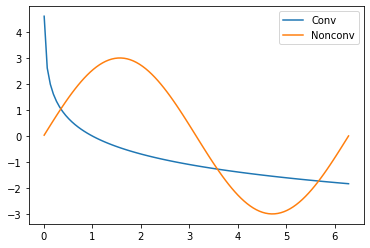

In [6]:
T = np.linspace(0.01,2*np.pi,100)
plt.plot(T,-np.log(T),label='Conv')
plt.plot(T,3*np.sin(T),label='Nonconv')
plt.legend()

### Conditions of convexity

**1st Order Condition** If f is differentiable then it is convex if 
$$
f(x) \ge f(x_0) + \nabla f(x_0)^\top (x - x_0), \forall x,x_0
$$
**2nd Order Condition** If f is twice differentiable then it is convex if 
$$
x^\top (\nabla^2 f(x)) x \ge 0, \forall x \tag{positive semi-definite}
$$

### Examples

- affine: $f(x) = A x + b$
- quadratic: $f(x) = x^\top A x + b^\top x + c$ for PSD $A$
- negative log: $f(x) = -\log x$
- log-sum-exp: $f(x) = \log(\sum_i \exp(b_i^\top x + c_i))$

Operations that preserve convexity: Addition, partial minimization (minimize some dimensions), composition of convex and non-decreasing convex

Most compositions do not preserve convexity (neural nets!).

### Exercise 4.1

Show that the 4 previous functions are convex using either of the two conditions above.

# STOP

### Gradient descent

For differentiable f *gradient descent* iterates
$$
x \gets x - \eta \nabla f(x)
$$
with possibly changing learning rate $\eta$.

Gradient descent has a fixed point $x_0$ if and only if $\nabla f(x_0) = 0$.

Recall **1st Order Condition**. If f is differentiable then it is convex if 
$$
f(x) \ge f(x_0) + \nabla f(x_0)^\top (x - x_0), \forall x,x_0
$$
and when $\nabla f(x_0) = 0$ then 
$$
f(x) \ge f(x_0), \forall x
$$
so any fixed point of gradient descent is a global min (for convex, differentiable f)

### Subgradient

Suppose $f$ is convex but not differentiable, but instead of the gradient we have some other $g(x)$ that satisfies the 1st order condition,
$$
f(x) \ge f(x_0) + g(x_0)^\top (x - x_0), \forall x,x_0.
$$
We will call such a $g$ a **subgradient**.

Then we can define subgradient descent to be
$$
x \gets x - \eta g(x)
$$
with possibly changing learning rate $\eta$.
Then we have that $x_0$ is a fixed point iff $g(x_0) = 0$ which is a minimizer. 

**Example**

Minimize $|x|$ (we know there is a minimizer at $x=0$).

**Attempt 1.**
$$
g(x) = \left\{ \begin{array}{cc} 1,&x \ge 0\\ -1,&x \le 0\end{array} \right.
$$
Can verify that this satisfies the 1st order condition (is a subgradient), 
$$
|x| \ge |x_0| + g(x_0)(x - x_0)
$$
but $0$ is not a fixed point of subgradient descent, $0 - \eta g(0) = -\eta \ne 0$.

**Attempt 2.**
$$
g(x) = \left\{ \begin{array}{cc} 1,&x > 0\\0,& x = 0\\-1,&x < 0\end{array} \right.
$$
- can verify that this is a subgradient also,
- and $0$ is a fixed point of subgradient descent, $0 - \eta g(0) = 0$.

> Subgradients are not unique, and not all subgradients are equally useful.

### Subdifferential

**Def.** $g(x_0) \in \mathbb R^p$ is a *subgradient* of $f$ at $x_0$ if  
$$
f(x) \ge f(x_0) + g(x_0)^\top (x - x_0), \forall x.
$$
The set of all subgradients at $x_0$ is call the *subdifferential*, denoted $\partial f(x_0)$.

![](subgradient.png)
Image from stronglyconvex.com

### Subdifferential 

1. $\partial f(x_0)$ is a closed and convex set
2. if $f$ is convex then the $\partial f(x_0)$ is non-empty and bounded
3. if $f$ is convex and differentiable then $\partial f(x_0) = \{\nabla f(x_0)\}$
4. The subgradient of a linear combination of functions is the linear combination of the subgradients
5. If $f$ is convex then $x_0$ is a minimizer iff $0 \in \partial f(x_0)$

**Ex.** $f(x) = |x|$ then 
- $\partial f(x) = \{1\}, x > 0$
- $\partial f(x) = \{-1\}, x < 0$
- $\partial f(x) = [-1,1], x = 0$
<img width=30% src="abs.png">
*image from wikipedia

**Ex.** Soft-thresholding $y,\beta \in \mathbb R^n$,
$$f(\beta) = \frac 12 \sum_{i=1}^n (y_i - \beta_i)^2 + \lambda \sum_{i=1}^n |\beta_i|$$  
The problem is separable
$$
\min_\beta f(\beta) = \frac 12 \sum_{i=1}^n \min_{\beta_i} f_i(\beta_i)
$$
where $f_i(\beta_i) = \frac 12 (y_i - \beta_i)^2 + \lambda |\beta_i|$

### Exercise 4.2
Prove that $f_i(b) = \frac 12 (y_i - b)^2 + \lambda |b|$ is minimized at
$$
b = \left\{ \begin{array}{ll} y_i - \lambda,& y_i > \lambda \\ y_i + \lambda,& y_i < -\lambda\\0,& |y_i| \le \lambda \end{array}\right.
$$
which is called soft thresholding.
<img src="soft.png" width=50%>
Image from Rajesh Ganesan

# STOP

### Solution to 4.2

Focus on minimizing $f_i(b) = \frac 12 (y_i - b)^2 + \lambda |b|$, which has subdifferential,
- $\partial f_i(b) = \{- (y_i - b) + \lambda \}, b > 0$
- $\partial f_i(b) = \{- (y_i - b) - \lambda \}, b < 0$
- $\partial f_i(b) = [- (y_i - b) - \lambda,- (y_i - b) + \lambda], b = 0$

When is $0 \in \partial f_i$?
- $y_i  > \lambda$ then $b = y_i - \lambda$ is only choice
- $y_i < - \lambda$ then $b = y_i + \lambda$ is only choice
- $|y_i| \le \lambda$ then $b = 0$ is only choice

### Orthonormal bases

Soft thresholding is commonly used for orthonormal bases.  
- Suppose that we have a vector $y_1,\ldots, y_T$ (like a time series).
- And we want to reconstruct $y$ with $W \beta$ where $\beta$ has a small sum of absolute values $\sum_i |\beta_i|$ 
- $W$ is $T \times T$ and $W W^\top = W^\top W = I$ (orthonormal full rank design)

Want to minimize 
$$
\frac 12 \sum_{i=1}^T (y - W \beta)_i^2 + \lambda \sum_{i=1}^T |\beta_i|.
$$

Then consider the least squares objective,
$$ \| y - W \beta\|^2 = (y - W \beta)^\top W W^\top(y - W \beta) = \| W^\top y - W^\top W \beta\|^2 =  \| W^\top y - \beta\|^2$$
Then we want to minimize 
$$
\frac 12 \sum_{i=1}^T (W^\top y - \beta_i)^2 + \lambda \sum_{i=1}^T |\beta_i|.
$$
which is solved by soft thresholding $(W^\top y)_i$ at $\lambda$.
Our denoised version of $y$ is then $\hat y = W \beta$.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
## Explore Turkish stock exchange dataset

tse = pd.read_excel('data_akbilgic.xlsx',skiprows=1)

tse = tse.rename(columns={'ISE':'TLISE','ISE.1':'USDISE'})

tse.head()

,date,TLISE,USDISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [9]:
tse.describe()

,TLISE,USDISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


In [10]:
tse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
date       536 non-null datetime64[ns]
TLISE      536 non-null float64
USDISE     536 non-null float64
SP         536 non-null float64
DAX        536 non-null float64
FTSE       536 non-null float64
NIKKEI     536 non-null float64
BOVESPA    536 non-null float64
EU         536 non-null float64
EM         536 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 42.0 KB


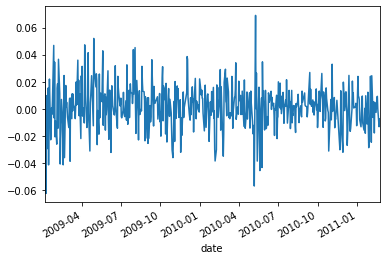

In [11]:
## Plot turkish lyra
tse = tse.set_index('date')

tse['TLISE'].plot()

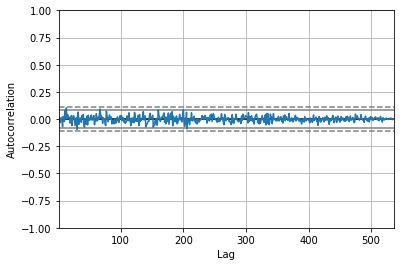

In [12]:
## Autocorrelation plot 
pd.plotting.autocorrelation_plot(tse['TLISE'])

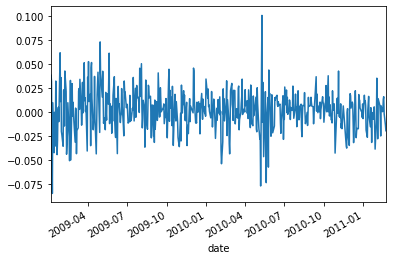

In [13]:
## USD
tse['USDISE'].plot()

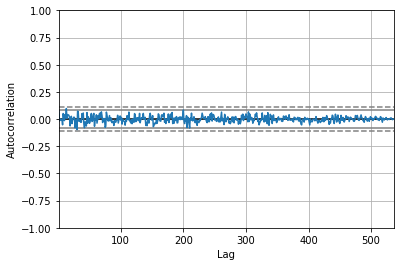

In [14]:
pd.plotting.autocorrelation_plot(tse['USDISE'])

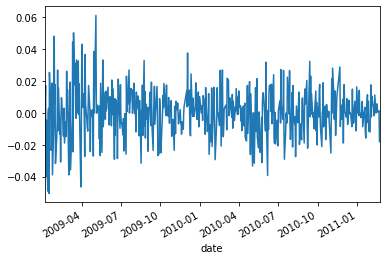

In [15]:
## NIKKEI index
tse['NIKKEI'].plot()

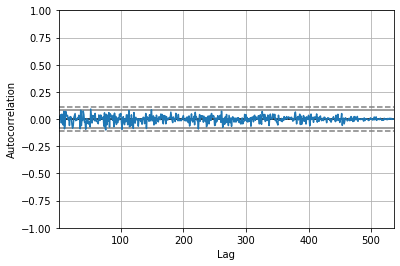

In [16]:
pd.plotting.autocorrelation_plot(tse['NIKKEI'])

In [17]:
## Volatility seems most interesting
## will construct local measure of volatility
## remove rolling window estimate (local centering)
## square the residuals

tse_trem = tse - tse.rolling("7D").mean()
tse_vol = tse_trem**2.

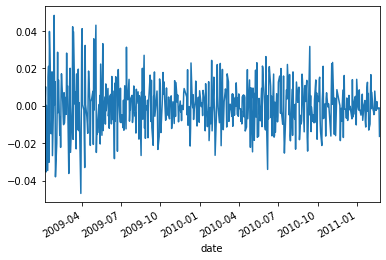

In [18]:
tse_trem['NIKKEI'].plot()

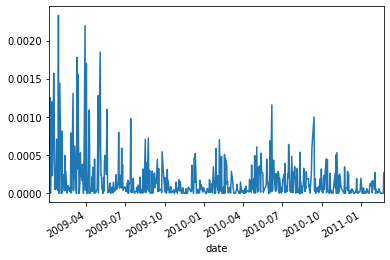

In [19]:
tse_vol['NIKKEI'].plot()

In [20]:
T,p = tse.shape

In [21]:
def const_wave(T,a,b):
    """build a single wavelet from a to b in a T vector"""
    wave = np.zeros(T)
    s1 = (b-a) // 2
    s2 = (b-a) - s1
    norm_C = (s1*s2 / (s1+s2))**0.5
    wave[a:a+s1] = norm_C / s1
    wave[a+s1:b] = -norm_C / s2
    return wave

In [22]:
def _const_wave_basis(T,a,b):
    """build the Haar wavelet basis of mother wavelets"""
    if b-a < 2:
        return []
    wave_basis = []
    wave_basis.append(const_wave(T,a,b))
    mid_pt = a + (b-a)//2
    wave_basis += _const_wave_basis(T,a,mid_pt)
    wave_basis += _const_wave_basis(T,mid_pt,b)
    return wave_basis

In [23]:
def const_wave_basis(T,a,b):
    """build the Haar wavelet basis of father wavelets"""
    father = np.ones(T) / T**0.5
    return [father] + _const_wave_basis(T,a,b)

In [24]:
# Construct discrete Haar wavelet basis
wave_basis = const_wave_basis(T,0,T)
W = np.array(wave_basis).T
W.shape

(536, 536)

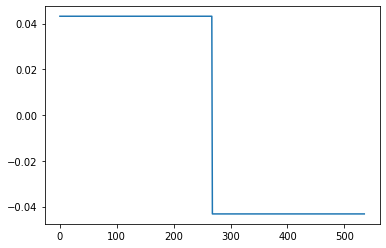

In [25]:
plt.plot(W[:,1])

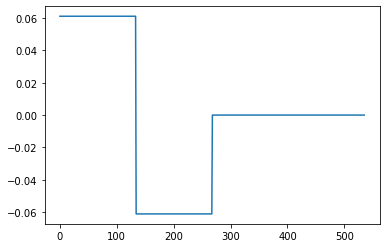

In [26]:
plt.plot(W[:,2])

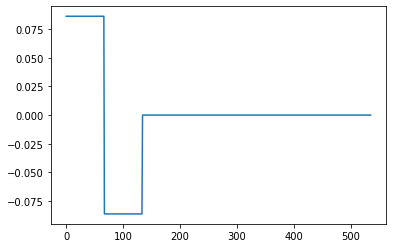

In [27]:
plt.plot(W[:,3])

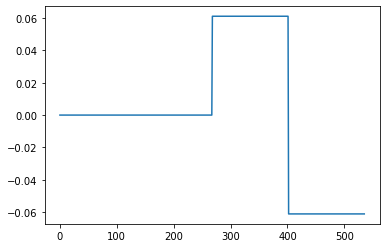

In [28]:
plt.plot(W[:,T//2+1])

In [29]:
## Verify that it is orthonormal

np.abs(W.T @ W - np.eye(W.shape[1])).sum(), np.abs(W @ W.T - np.eye(W.shape[1])).sum()

(1.7616230886532e-13, 2.1148587375757294e-13)

In [30]:
def soft(y,lamb):
    """soft thresholding"""
    pos_part = (y - lamb) * (y > lamb)
    neg_part = (y + lamb) * (y < -lamb)
    return pos_part + neg_part

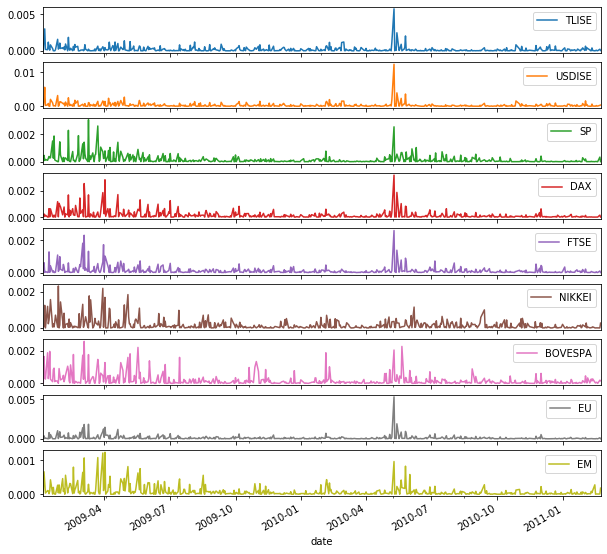

In [31]:
_ = tse_vol.plot(subplots=True,figsize=(10,10))

### Exercise 4.3

You can access the Y values with `tse_vol.values` which are the 9 stock indices over time.  Apply the wavelet transform constructed above and soft thresholding with different values of lambda.  Remark on the effect of changing lambda.  Find a range of lambdas that give reasonable values for the output of soft-thresholding.

In [32]:
## Solution to 4.3
## Make wavelet transformation and soft threshold

tse_wave = W.T @ tse_vol.values
lamb = .0001
tse_soft = soft(tse_wave,lamb)
tse_rec = W @ tse_soft
tse_den = tse_vol.copy()
tse_den.iloc[:,:] = tse_rec

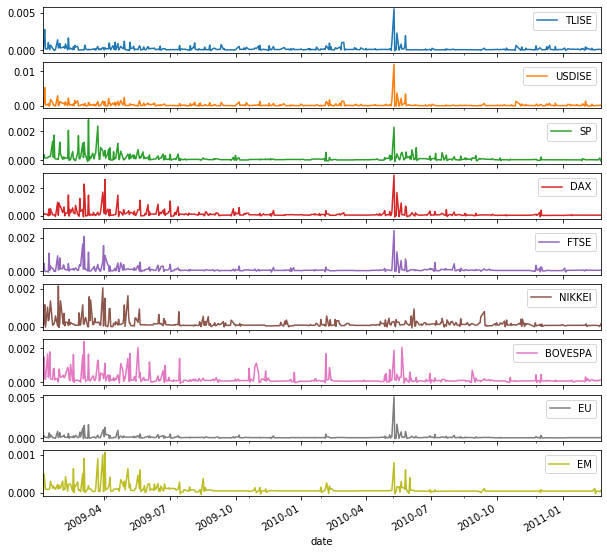

In [33]:
_ = tse_den.plot(subplots=True,figsize=(10,10))

In [34]:
## Make wavelet transformation and soft threshold

tse_wave = W.T @ tse_vol.values
lamb = .0005
tse_soft = soft(tse_wave,lamb)
tse_rec = W @ tse_soft
tse_den = tse_vol.copy()
tse_den.iloc[:,:] = tse_rec

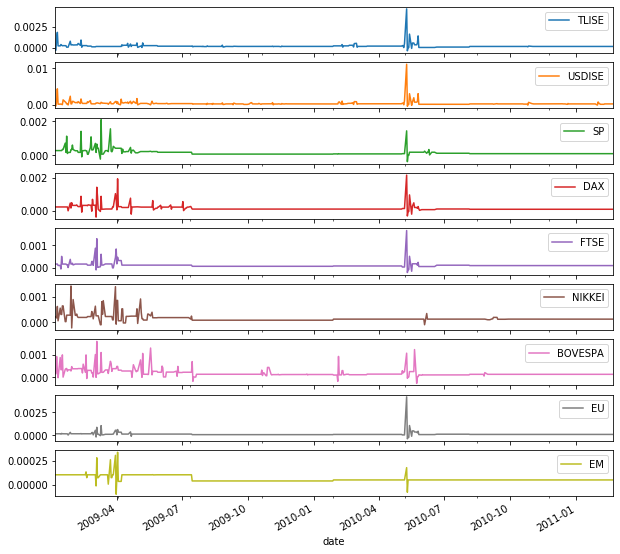

In [35]:
_ = tse_den.plot(subplots=True,figsize=(10,10))

In [36]:
## Make wavelet transformation and soft threshold

tse_wave = W.T @ tse_vol.values
lamb = .001
tse_soft = soft(tse_wave,lamb)
tse_rec = W @ tse_soft
tse_den = tse_vol.copy()
tse_den.iloc[:,:] = tse_rec

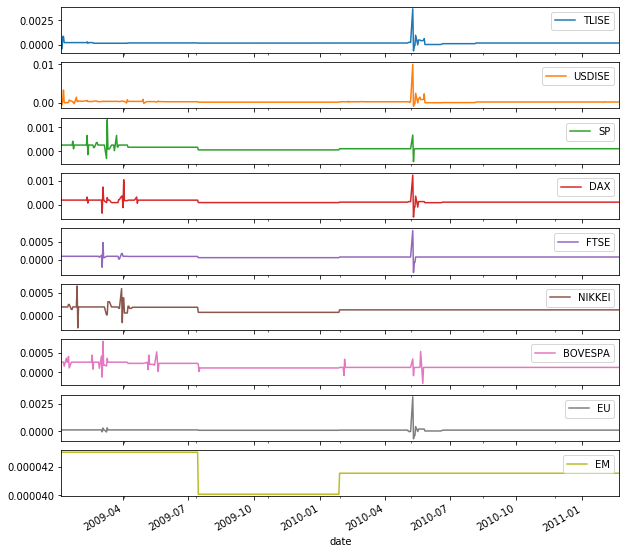

In [37]:
_ = tse_den.plot(subplots=True,figsize=(10,10))